In [1]:
library(Seurat)
library(glue)

Attaching SeuratObject

Warning message:
“package ‘glue’ was built under R version 4.1.3”


In [2]:
setwd("~/Gusev_Lab/Light_Hvratin/data/")
load("GSE102827_MATRIX.RDat")


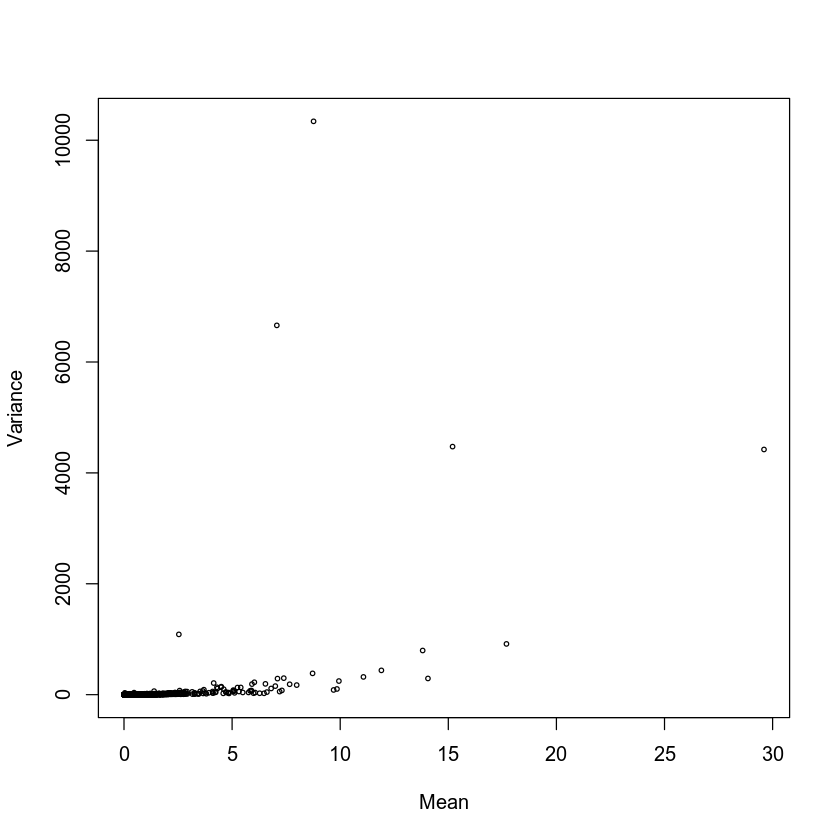

In [3]:
mus = apply( exp , 1 , mean )
sds = apply( exp , 1 , sd )
keep = sds^2 <1000
plot( mus , sds^2 , xlab="Mean" , ylab="Variance" , cex=0.5 )

In [4]:
head(meta)

,stim,sample,maintype,celltype,subtype
,<chr>,<chr>,<chr>,<chr>,<chr>
x2_35_0_bc0013,0h,B1_1_0h,Excitatory,ExcL4,ExcL4_3
x2_35_0_bc0014,0h,B1_1_0h,Excitatory,ExcL5_3,NA
x2_35_0_bc0016,0h,B1_1_0h,Excitatory,ExcL5_2,NA
x2_35_0_bc0017,0h,B1_1_0h,Excitatory,ExcL6,NA
x2_35_0_bc0018,0h,B1_1_0h,Excitatory,ExcL5_3,NA
x2_35_0_bc0019,0h,B1_1_0h,Excitatory,ExcL23,ExcL23_1


In [5]:
meta$time = as.numeric(substr((meta$stim),1,1))

In [6]:
runs = rle(sort( meta$maintype ))
cbind( runs$val , runs$len )

Astrocytes,7039
Endothelial_SmoothMuscle,4071
Excitatory,14287
Interneurons,936
Macrophages,537
Microglia,10158
Mural,782
Oligodendrocytes,10456


In [7]:
sum(!is.na(meta$maintype))

[1] 48266

Visualize

In [8]:
library("ggplot2")

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”


In [9]:
exp = log( 1 + exp )
mus = apply( exp , 1 , mean )
sds = apply( exp , 1 , sd )

length(mus)
sum(mus!=0)

[1] 25187

[1] 20671

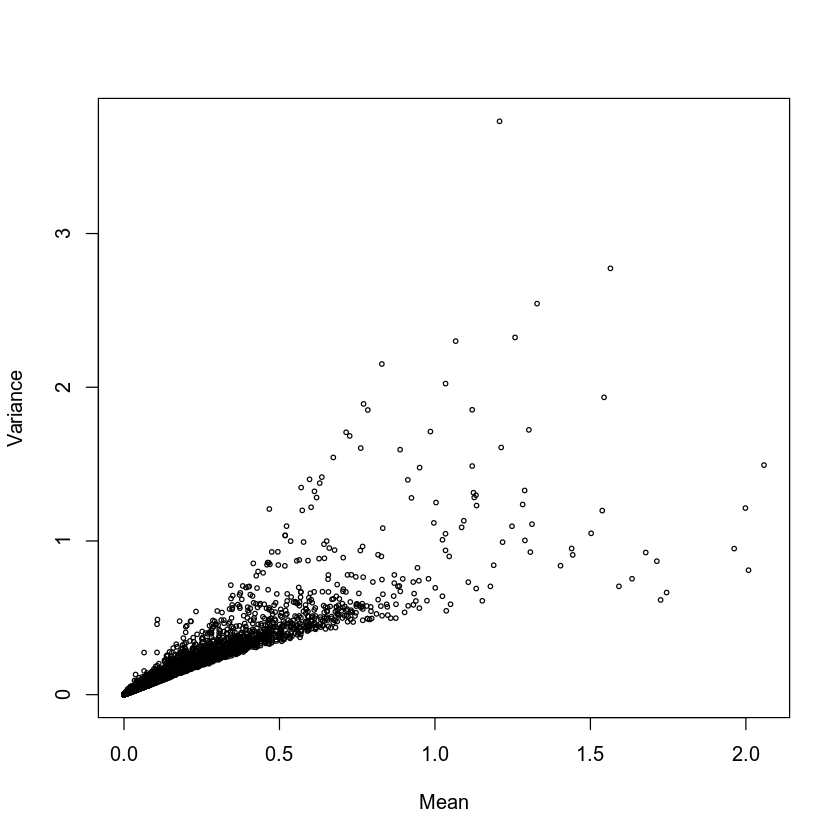

In [10]:
keep = sds > 0
plot( mus[keep] , sds[keep]^2 , xlab="Mean" , ylab="Variance" , cex=0.5 )

[1] 0.8175646

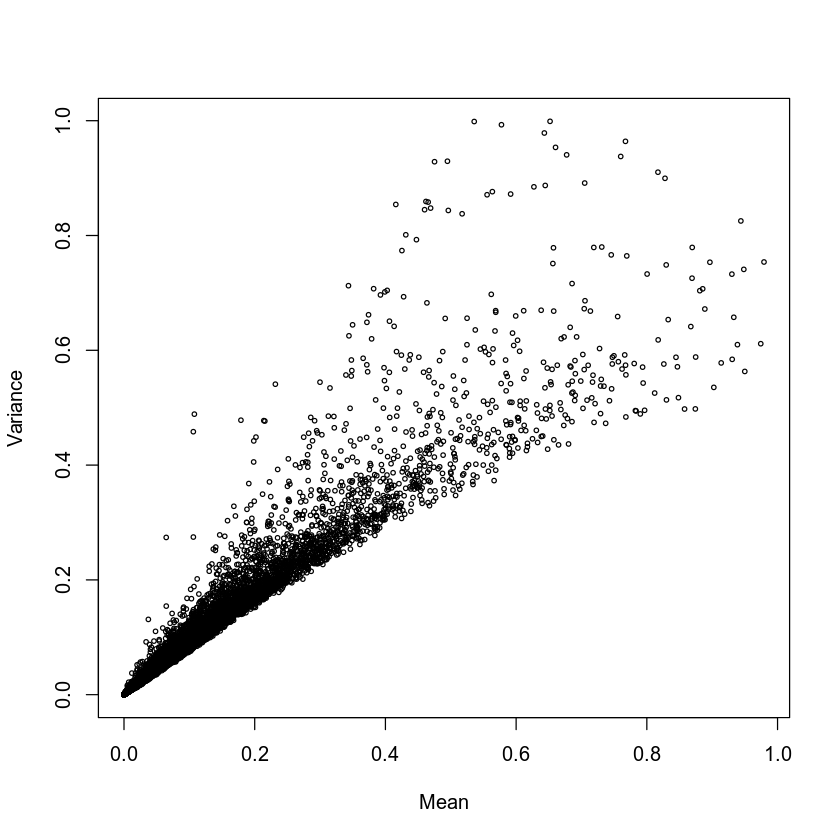

In [11]:
# remove outlier genes with extreme expression
genes.keep = sds > 0 & sds^2 < 1 & mus < 1
mean(genes.keep)
plot( mus[genes.keep] , sds[genes.keep]^2 , xlab="Mean" , ylab="Variance" , cex=0.5 )

In [12]:
# plot number of expressed genes per cell
ngenes = apply( exp[genes.keep,] != 0 , 2 , sum )

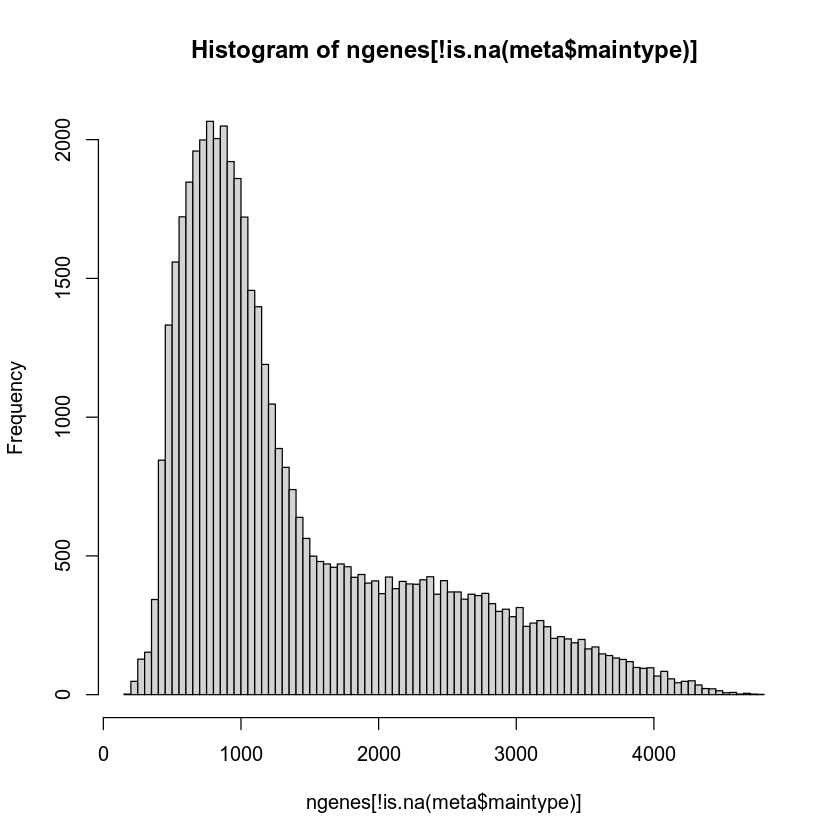

In [13]:
hist(ngenes[!is.na(meta$maintype)],breaks=100)

In [14]:
cells.keep = !is.na(meta$maintype) & ngenes > 500
mean(cells.keep)

[1] 0.6929462

In [15]:
sum(genes.keep & sds^2 > 0.05)

[1] 6338

In [19]:
# # sample top genes for efficiency
# rgenes = sample(which( genes.keep & sds^2 > 0.2 ),1000)
# y.sample = scale( t(exp[ rgenes , cells.keep ]) )
# dim(y.sample)

In [16]:
final_exp = exp[ genes.keep , cells.keep ]

In [17]:
saveRDS(rownames(final_exp), file="genes_names_QC.rds")
saveRDS(colnames(final_exp), file="cell_names_QC.rds")

In [18]:
length(colnames(final_exp))
dim(final_exp)

[1] 45415

[1] 20592 45415

In [19]:
exp_seu <- CreateSeuratObject(counts = final_exp)

In [20]:
exp_seu <- FindVariableFeatures(exp_seu, selection.method = "vst", nfeatures = 20000)
var_feat = exp_seu@assays$RNA@var.features

In [21]:
final_exp = exp[ var_feat , cells.keep ]
dim(final_exp)

[1] 20000 45415

In [22]:
dim(final_exp)

[1] 20000 45415

In [23]:
head(final_exp)

,x2_35_0_bc0013,x2_35_0_bc0014,x2_35_0_bc0016,x2_35_0_bc0017,x2_35_0_bc0018,x2_35_0_bc0019,x2_35_0_bc0020,x2_35_0_bc0021,x2_35_0_bc0022,x2_35_0_bc0023,⋯,x2_98_4_2_2_bc2438,x2_98_4_2_2_bc2440,x2_98_4_2_2_bc2446,x2_98_4_2_2_bc2463,x2_98_4_2_2_bc2508,x2_98_4_2_2_bc2533,x2_98_4_2_2_bc2550,x2_98_4_2_2_bc2576,x2_98_4_2_2_bc2597,x2_98_4_2_2_bc2769
Hbb-bs,0,0,0,0.0000000,0,0,0.0000000,0,0.000000,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Hbb-bt,0,0,0,0.0000000,0,0,0.0000000,0,0.000000,0.2000469,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Vip,0,0,0,0.0000000,0,0,0.0000000,0,0.000000,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Hba-a2,0,0,0,0.0000000,0,0,0.2288393,0,0.000000,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Sst,0,0,0,0.0000000,0,0,0.0000000,0,2.144433,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Rgs5,0,0,0,0.8062526,0,0,0.0000000,0,0.000000,0.0000000,⋯,0,4.569429,0,0,0,0,3.447317,0,0,0


In [24]:
final_meta = meta[match(colnames(final_exp),rownames(meta) ),]

In [25]:
dim(final_meta)
dim(final_exp)

[1] 45415     6

[1] 20000 45415

In [26]:
exp = final_exp
meta = final_meta
dim(exp)
dim(meta)

[1] 20000 45415

[1] 45415     6

In [27]:
save(exp, meta, file = "QC_GSE102827_MATRIX_20k_vargenes.RData")

In [1]:
load("QC_GSE102827_MATRIX_20k_vargenes.RData")

Warning message in readChar(con, 5L, useBytes = TRUE):
“cannot open compressed file 'QC_GSE102827_MATRIX_20k_vargenes.RData', probable reason 'No such file or directory'”


ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


In [29]:
indices = rownames(meta)
genes = rownames(exp)

In [30]:
head(exp)
dim(exp)

,x2_35_0_bc0013,x2_35_0_bc0014,x2_35_0_bc0016,x2_35_0_bc0017,x2_35_0_bc0018,x2_35_0_bc0019,x2_35_0_bc0020,x2_35_0_bc0021,x2_35_0_bc0022,x2_35_0_bc0023,⋯,x2_98_4_2_2_bc2438,x2_98_4_2_2_bc2440,x2_98_4_2_2_bc2446,x2_98_4_2_2_bc2463,x2_98_4_2_2_bc2508,x2_98_4_2_2_bc2533,x2_98_4_2_2_bc2550,x2_98_4_2_2_bc2576,x2_98_4_2_2_bc2597,x2_98_4_2_2_bc2769
Hbb-bs,0,0,0,0.0000000,0,0,0.0000000,0,0.000000,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Hbb-bt,0,0,0,0.0000000,0,0,0.0000000,0,0.000000,0.2000469,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Vip,0,0,0,0.0000000,0,0,0.0000000,0,0.000000,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Hba-a2,0,0,0,0.0000000,0,0,0.2288393,0,0.000000,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Sst,0,0,0,0.0000000,0,0,0.0000000,0,2.144433,0.0000000,⋯,0,0.000000,0,0,0,0,0.000000,0,0,0
Rgs5,0,0,0,0.8062526,0,0,0.0000000,0,0.000000,0.0000000,⋯,0,4.569429,0,0,0,0,3.447317,0,0,0


[1] 20000 45415

In [31]:
load("GSE102827_MATRIX.RDat")

In [32]:
dim(exp)
exp = exp[genes,indices]
dim(exp)
head(exp)

[1] 25187 65539

[1] 20000 45415

,x2_35_0_bc0013,x2_35_0_bc0014,x2_35_0_bc0016,x2_35_0_bc0017,x2_35_0_bc0018,x2_35_0_bc0019,x2_35_0_bc0020,x2_35_0_bc0021,x2_35_0_bc0022,x2_35_0_bc0023,⋯,x2_98_4_2_2_bc2438,x2_98_4_2_2_bc2440,x2_98_4_2_2_bc2446,x2_98_4_2_2_bc2463,x2_98_4_2_2_bc2508,x2_98_4_2_2_bc2533,x2_98_4_2_2_bc2550,x2_98_4_2_2_bc2576,x2_98_4_2_2_bc2597,x2_98_4_2_2_bc2769
Hbb-bs,0,0,0,0.0000,0,0,0.00000,0,0.0000,0.00000,⋯,0,0.000,0,0,0,0,0.000,0,0,0
Hbb-bt,0,0,0,0.0000,0,0,0.00000,0,0.0000,0.22146,⋯,0,0.000,0,0,0,0,0.000,0,0,0
Vip,0,0,0,0.0000,0,0,0.00000,0,0.0000,0.00000,⋯,0,0.000,0,0,0,0,0.000,0,0,0
Hba-a2,0,0,0,0.0000,0,0,0.25714,0,0.0000,0.00000,⋯,0,0.000,0,0,0,0,0.000,0,0,0
Sst,0,0,0,0.0000,0,0,0.00000,0,7.5372,0.00000,⋯,0,0.000,0,0,0,0,0.000,0,0,0
Rgs5,0,0,0,1.2395,0,0,0.00000,0,0.0000,0.00000,⋯,0,95.489,0,0,0,0,30.416,0,0,0


In [33]:
dim(meta)
meta = meta[indices,]
meta

[1] 65539     5

,stim,sample,maintype,celltype,subtype
,<chr>,<chr>,<chr>,<chr>,<chr>
x2_35_0_bc0013,0h,B1_1_0h,Excitatory,ExcL4,ExcL4_3
x2_35_0_bc0014,0h,B1_1_0h,Excitatory,ExcL5_3,NA
x2_35_0_bc0016,0h,B1_1_0h,Excitatory,ExcL5_2,NA
x2_35_0_bc0017,0h,B1_1_0h,Excitatory,ExcL6,NA
x2_35_0_bc0018,0h,B1_1_0h,Excitatory,ExcL5_3,NA
x2_35_0_bc0019,0h,B1_1_0h,Excitatory,ExcL23,ExcL23_1
x2_35_0_bc0020,0h,B1_1_0h,Excitatory,ExcL5_2,NA
x2_35_0_bc0021,0h,B1_1_0h,Excitatory,ExcL6,NA
x2_35_0_bc0022,0h,B1_1_0h,Interneurons,Int_Pv,NA


In [34]:
save(exp, meta, file = "counts_norm_sub_GSE102827_MATRIX_20k_vargenes.RData")

In [11]:
length(genes)
dim(exp)

[1] 3000

[1]  3000 45415

In [16]:
str(exp_seu)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:6416900] 27 95 99 100 103 109 135 138 148 153 ...
  .. .. .. .. .. ..@ p       : int [1:45416] 0 167 324 484 649 808 969 1154 1308 1488 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 3000 45415
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:3000] "Hbb-bs" "Hbb-bt" "Vip" "Hba-a2" ...
  .. .. .. .. .. .. ..$ : chr [1:45415] "x2_35_0_bc0013" "x2_35_0_bc0014" "x2_35_0_bc0016" "x2_35_0_bc0017" ...
  .. .. .. .. .. ..@ x       : num [1:6416900] 0.212 0.212 0.212 0.212 1.695 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:6416900] 27 95 99 100 103 109 135 138 148 153 ...
 

In [20]:
str(exp_seu)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:6416900] 27 95 99 100 103 109 135 138 148 153 ...
  .. .. .. .. .. ..@ p       : int [1:45416] 0 167 324 484 649 808 969 1154 1308 1488 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 3000 45415
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:3000] "Hbb-bs" "Hbb-bt" "Vip" "Hba-a2" ...
  .. .. .. .. .. .. ..$ : chr [1:45415] "x2_35_0_bc0013" "x2_35_0_bc0014" "x2_35_0_bc0016" "x2_35_0_bc0017" ...
  .. .. .. .. .. ..@ x       : num [1:6416900] 0.212 0.212 0.212 0.212 1.695 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:6416900] 27 95 99 100 103 109 135 138 148 153 ...
 

In [21]:
head(exp_seu$RNA@counts)
head(exp_seu$RNA@data)

  [[ suppressing 34 column names ‘x2_35_0_bc0013’, ‘x2_35_0_bc0014’, ‘x2_35_0_bc0016’ ... ]]



6 x 45415 sparse Matrix of class "dgCMatrix"
                                                                              
Hbb-bs . . . .      . . .       . .      .       . . . . . . 0.24302 . .      
Hbb-bt . . . .      . . .       . .      0.22146 . . . . . . .       . 0.22948
Vip    . . . .      . . .       . .      .       . . . . . . .       . .      
Hba-a2 . . . .      . . 0.25714 . .      .       . . . . . . 0.24302 . 0.45897
Sst    . . . .      . . .       . 7.5372 .       . . . . . . .       . .      
Rgs5   . . . 1.2395 . . .       . .      .       . . . . . . .       . .      
                                                                   
Hbb-bs . . .       .       . .       .       . . . . . . . . ......
Hbb-bt . . .       .       . .       .       . . . . . . . . ......
Vip    . . .       .       . .       .       . . . . . . . . ......
Hba-a2 . . .       0.24702 . 0.23384 .       . . . . . . . . ......
Sst    . . .       .       . .       0.26502 . . . . . . . . .

  [[ suppressing 34 column names ‘x2_35_0_bc0013’, ‘x2_35_0_bc0014’, ‘x2_35_0_bc0016’ ... ]]



6 x 45415 sparse Matrix of class "dgCMatrix"
                                                                              
Hbb-bs . . . .      . . .       . .      .       . . . . . . 0.24302 . .      
Hbb-bt . . . .      . . .       . .      0.22146 . . . . . . .       . 0.22948
Vip    . . . .      . . .       . .      .       . . . . . . .       . .      
Hba-a2 . . . .      . . 0.25714 . .      .       . . . . . . 0.24302 . 0.45897
Sst    . . . .      . . .       . 7.5372 .       . . . . . . .       . .      
Rgs5   . . . 1.2395 . . .       . .      .       . . . . . . .       . .      
                                                                   
Hbb-bs . . .       .       . .       .       . . . . . . . . ......
Hbb-bt . . .       .       . .       .       . . . . . . . . ......
Vip    . . .       .       . .       .       . . . . . . . . ......
Hba-a2 . . .       0.24702 . 0.23384 .       . . . . . . . . ......
Sst    . . .       .       . .       0.26502 . . . . . . . . .

In [24]:
exp_seu <- CreateSeuratObject(counts = exp, meta.data = meta)

In [23]:
rownames(exp_seu@meta.data[!is.na(exp_seu@meta.data$maintype),])

character(0)

In [29]:
sub = subset(x = exp_seu, subset = maintype == "Excitatory" | maintype == 'Interneurons')

In [30]:
sub

An object of class Seurat 
3000 features across 15174 samples within 1 assay 
Active assay: RNA (3000 features, 0 variable features)

In [31]:
sub@assays$RNA@counts[genes,]

  [[ suppressing 32 column names ‘x2_35_0_bc0013’, ‘x2_35_0_bc0014’, ‘x2_35_0_bc0016’ ... ]]



3000 x 15174 sparse Matrix of class "dgCMatrix"
                                                                          
Hbb-bs         .        .        .        .        .       .       .      
Hbb-bt         .        .        .        .        .       .       .      
Vip            .        .        .        .        .       .       .      
Hba-a2         .        .        .        .        .       .       0.25714
Sst            .        .        .        .        .       .       .      
Rgs5           .        .        .        1.23950  .       .       .      
Hba-a1         .        .        .        .        .       .       .      
Myoc           .        .        .        .        .       .       .      
Pdgfra         .        .        .        .        .       .       .      
Vtn            .        .        .        .        .       .       .      
Flt1           .        .        .        .        .       .       .      
Npy            .        .        .        .        .

In [33]:
load("QC_GSE102827_MATRIX.RData")